Linear Regression - MSE: 2.86, R2: 0.95
Polynomial Regression - MSE: 3.29, R2: 0.95
Ridge Regression - MSE: 2.86, R2: 0.95
Lasso Regression - MSE: 2.87, R2: 0.95
Linear Regression - CV R2 Score: 0.93
Polynomial Regression - CV R2 Score: 0.93
Ridge Regression - CV R2 Score: 0.93
Lasso Regression - CV R2 Score: 0.93


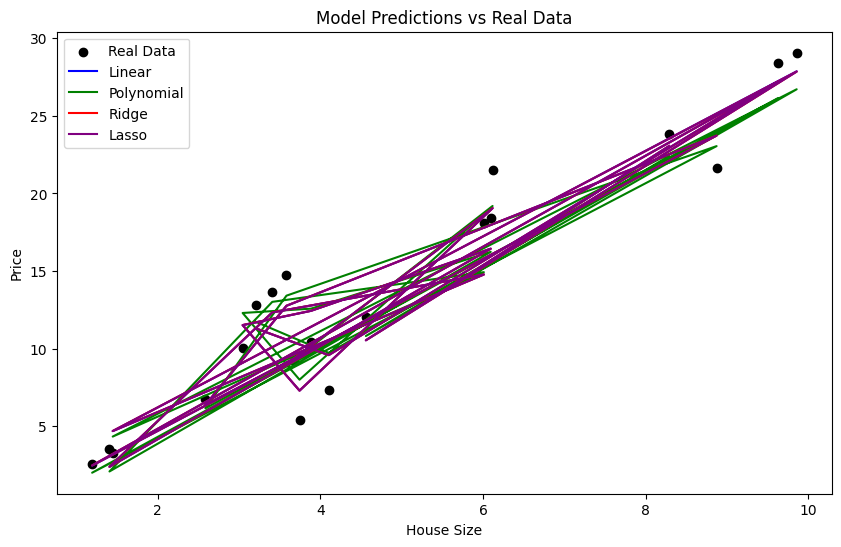

In [4]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Пример данных: прогнозирование цен на жилье с несколькими признаками
np.random.seed(42)
num_samples = 100
X = np.random.rand(num_samples, 2) * 10  # Два признака: площадь и возраст дома
y = 2.5 * X[:, 0] - 0.8 * X[:, 1] + np.random.randn(num_samples) * 2 + 5  # Цена жилья с шумом

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Линейная регрессия
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Полиномиальная регрессия (степень полинома = 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train_scaled)
X_poly_test = poly_features.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# Ridge-регрессия с GridSearchCV для подбора альфа
ridge_model = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

# Lasso-регрессия с GridSearchCV для подбора альфа
lasso_model = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1.0]}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)

# Оценка моделей с использованием кросс-валидации
def evaluate_model_cv(model, X_train, y_train, model_name):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{model_name} - CV R2 Score: {np.mean(scores):.2f}")

# Выводим оценку моделей на основе тестовой выборки и кросс-валидации
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")

# Оценка на тестовых данных
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# Оценка на кросс-валидации
evaluate_model_cv(linear_model, X_train_scaled, y_train, "Linear Regression")
evaluate_model_cv(poly_model, X_poly_train, y_train, "Polynomial Regression")
evaluate_model_cv(best_ridge, X_train_scaled, y_train, "Ridge Regression")
evaluate_model_cv(best_lasso, X_train_scaled, y_train, "Lasso Regression")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='black', label='Real Data')  # X_test[:, 0] - площадь
plt.plot(X_test[:, 0], y_pred_linear, color='blue', label='Linear')
plt.plot(X_test[:, 0], y_pred_poly, color='green', label='Polynomial')
plt.plot(X_test[:, 0], y_pred_ridge, color='red', label='Ridge')
plt.plot(X_test[:, 0], y_pred_lasso, color='purple', label='Lasso')
plt.legend()
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('Model Predictions vs Real Data')
plt.show()
